<a href="https://colab.research.google.com/github/toche7/AI_ITM/blob/main/Lab4NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/toche7/DataSets/main/admit.csv')
df.head()

,SubjectA,SubjectB,Label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
import seaborn as sns

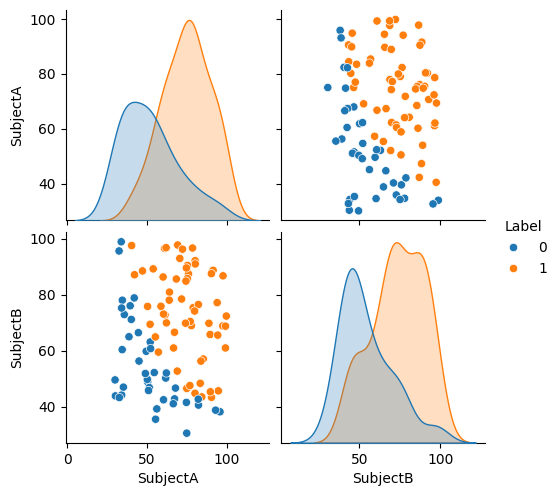

In [6]:
sns.pairplot(df, hue='Label')

In [9]:
X = df[['SubjectA','SubjectB']]
X.head()

,SubjectA,SubjectB
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [12]:
y = df['Label']
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Label, dtype: int64

In [13]:
from sklearn.neural_network import MLPClassifier

In [14]:
nn = MLPClassifier(solver='lbfgs', alpha= 0.00001, hidden_layer_sizes= (10,), random_state= 10, max_iter=500)

In [15]:
nn.fit(X,y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10,), max_iter=500,
              random_state=10, solver='lbfgs')

In [16]:
nn.predict(X)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [18]:
nn.score(X,y)

0.95

In [19]:
nn.coefs_

[array([[ -0.04489505,  -1.50538753,   0.18899983,   2.29045298,
           2.37391525,  -7.31628417,  -1.64040576, -18.27171582,
           1.95234842,  -2.36053724],
        [  3.22546151,   1.02780304,  -0.70149592,  -1.03209384,
          -1.77469389, -16.35916898,  -2.11172704,  -8.93238201,
          -1.35416692,   0.71009827]]),
 array([[  1.65344874],
        [-11.88730362],
        [  0.60359102],
        [ -7.32785404],
        [  2.35401425],
        [  0.12051909],
        [ -0.17229999],
        [ -2.65547207],
        [  5.96329656],
        [ -1.36365918]])]

In [20]:
nn.intercepts_

[array([-10.4618045 ,  -0.17535384,  -0.17912321,   8.30453835,
         11.14913581,  -0.26264335,   0.14648161,  -0.219579  ,
          2.77649785,  -1.35755913]),
 array([-23.7148762])]

## Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [22]:
pred = nn.predict(X)
pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [23]:
cm = confusion_matrix(y,pred, labels = nn.classes_)
cm

array([[37,  3],
       [ 2, 58]])

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= nn.classes_)

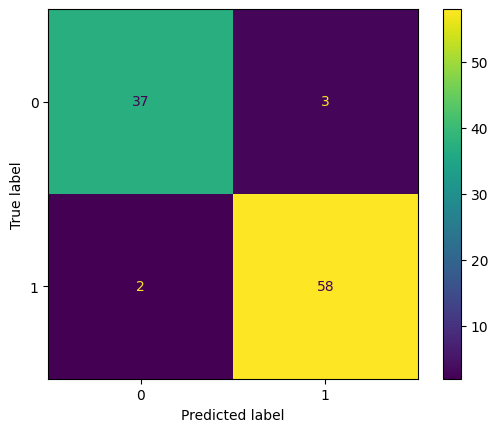

In [25]:
disp.plot()

## Precision, Recall and F-Score

In [26]:
from sklearn.metrics import precision_recall_fscore_support as score

In [27]:
score(y,pred)

(array([0.94871795, 0.95081967]),
 array([0.925     , 0.96666667]),
 array([0.93670886, 0.95867769]),
 array([40, 60]))

In [28]:
score(y,pred, average='micro')

(0.95, 0.95, 0.9500000000000001, None)

In [29]:
# precision micro average
(58 + 37)/100

0.95

In [30]:
score(y,pred, average='macro')

(0.9497688104245481, 0.9458333333333333, 0.9476932733549535, None)

In [32]:
# precision macro average
(58/61 + 37/39)/2

0.9497688104245481